In [116]:
import pandas as pd
all_data = pd.read_csv('./all_data.csv')
ques_morning_dams = pd.read_csv('../../datas/preprocessed_questionaire/ques_morning_dams.csv')
ques_evening_dams = pd.read_csv('../../datas/preprocessed_questionaire/ques_evening_dams.csv')

ques_morning_dams = ques_morning_dams[['user_id','date','positive_score','depressive_score','anxious_score']]
ques_evening_dams = ques_evening_dams[['user_id','date','positive_score','depressive_score','anxious_score']]

In [117]:
all_data_use = all_data[['user_id','date','食事','単独作業', '趣味・休憩', '家事・育児', '休憩（業務時間内）', '移動', 'web会議', 'その他', '業務外作業','対面会議', '共同作業（コミュニケーションを伴う）', '電話（会議）','age','sex','コア業務（自身が本来担当している業務）','ノンコア業務（自身が本来担当ではない業務）']]
cluster_data = pd.merge(all_data_use, ques_morning_dams, on=['user_id','date'])
cluster_data = pd.merge(cluster_data, ques_evening_dams, on=['user_id','date'])

In [118]:
cluster_data = cluster_data.rename(columns={
'食事':'meals',
'単独作業':'working_alone', 
'趣味・休憩':'hobbies/breaks', 
'家事・育児':'housework/childcare', 
'休憩（業務時間内）':'breaks(induty)', 
'移動':'travel', 
'web会議':'web_conference', 
'その他':'other', 
'業務外作業':'non_work',
'対面会議':'facettoface_meetings', 
'共同作業（コミュニケーションを伴う）':'collaborative_work', 
'電話（会議）':'telephone(conference)'})
task_columns = cluster_data[[
     'meals',
    'working_alone', 
    'hobbies/breaks', 
    'housework/childcare', 
    'breaks(induty)', 
    'travel', 
    'web_conference', 
    'other', 
    'non_work',
    'facettoface_meetings', 
    'collaborative_work', 
    'telephone(conference)']].columns
cluster_data.loc[cluster_data['meals']<0, 'meals']=0
cluster_data.loc[cluster_data['working_alone']<0, 'working_alone']=0
cluster_data.loc[cluster_data['hobbies/breaks']<0, 'hobbies/breaks']=0
cluster_data.loc[cluster_data['housework/childcare']<0, 'housework/childcare']=0
cluster_data.loc[cluster_data['breaks(induty)']<0, 'breaks(induty)']=0
cluster_data.loc[cluster_data['travel']<0, 'travel']=0
cluster_data.loc[cluster_data['web_conference']<0, 'web_conference']=0
cluster_data.loc[cluster_data['other']<0, 'other']=0
cluster_data.loc[cluster_data['non_work']<0, 'non_work']=0
cluster_data.loc[cluster_data['facettoface_meetings']<0, 'facettoface_meetings']=0
cluster_data.loc[cluster_data['collaborative_work']<0, 'collaborative_work']=0
cluster_data.loc[cluster_data['telephone(conference)']<0, 'telephone(conference)']=0
cluster_data['age']=cluster_data['age'].fillna(43)



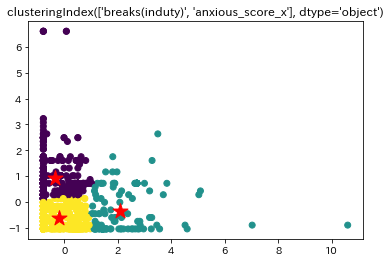

In [142]:
from matplotlib import pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans
import numpy as np
import japanize_matplotlib

X=cluster_data[[
   #   'meals',
   #  'working_alone', 
   #  'hobbies/breaks', 
   #  'housework/childcare', 
    'breaks(induty)', 
   #  'travel', 
   #  'web_conference', 
   #  'other', 
   #  'non_work',
   #  'facettoface_meetings', 
   #  'collaborative_work', 
   #  'telephone(conference)',
      #   'age',
      #  'sex',
    #      'コア業務（自身が本来担当している業務）', 'ノンコア業務（自身が本来担当ではない業務）',
      #  'positive_score_x'
      #  'depressive_score_x', 
    'anxious_score_x',
    #    'positive_score_y', 'depressive_score_y', 'anxious_score_y'
       ]]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)
# クラスタリング
cls = KMeans(n_clusters=3)
result = cls.fit(X_norm)
# 結果を出力
columns=X.columns
plt.title('clustering{}'.format(columns))
plt.scatter(X_norm[:,0],X_norm[:,1], c=result.labels_)
plt.scatter(result.cluster_centers_[:,0],result.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.show()

In [120]:
from sklearn import datasets, preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

from pyclustering.cluster import gmeans, xmeans
import itertools

In [128]:
X=cluster_data[[
    # 'meals',
    'working_alone'
    # 'hobbies/breaks', 
    # 'housework/childcare',
    # 'breaks(induty)',
    # 'travel',
    # 'web_conference',
    # 'other', 
    # 'non_work',
    # 'facettoface_meetings',
    # 'collaborative_work', 
    # 'telephone(conference)'
       ]]
Y=cluster_data[[       'positive_score_x'
    #    'depressive_score_x', 'anxious_score_x',
    #    'positive_score_y', 'depressive_score_y', 'anxious_score_y'
    ]]

## Xmeans法を用いたクラスタリング

In [92]:
#　pcaで次元圧縮
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
vecs_list=pca.fit_transform(X)

# # 元データをプロット
# fig = px.scatter(x=vecs_list[:, 0], y=vecs_list[:, 1], color=Y)
# fig.show()

pred = KMeans(n_clusters=8).fit_predict(X)

# k-meansによるクラスタをプロット
x_columns = X.columns
y_columns = Y.columns
fig = px.scatter(x=vecs_list[:, 0], y=vecs_list[:, 1], color=pred,
                title='y:{0},x:{1}'.format(y_columns,x_columns))
fig.update_layout(font={"family":"Meiryo", "size":8})
fig.show()

# X-means
xmeans_instance = xmeans.xmeans(X).process()

clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

labels_size = len(
    list(itertools.chain.from_iterable(clusters))
)
labels = np.zeros((1, labels_size))
for n, n_th_cluster in np.ndenumerate(clusters):
    for img_num in n_th_cluster:
        labels[0][img_num] = n[0]
labels = labels.ravel()

# x-meansによるクラスタをプロット
fig = px.scatter(x=vecs_list[:, 0], y=vecs_list[:, 1], color=labels,
                      title='y:{0},x:{1}'.format(y_columns,x_columns))
fig.update_layout(font={"family":"Meiryo", "size":8})
fig.show()


/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



## 階層クラスタリング

In [176]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
%matplotlib inline

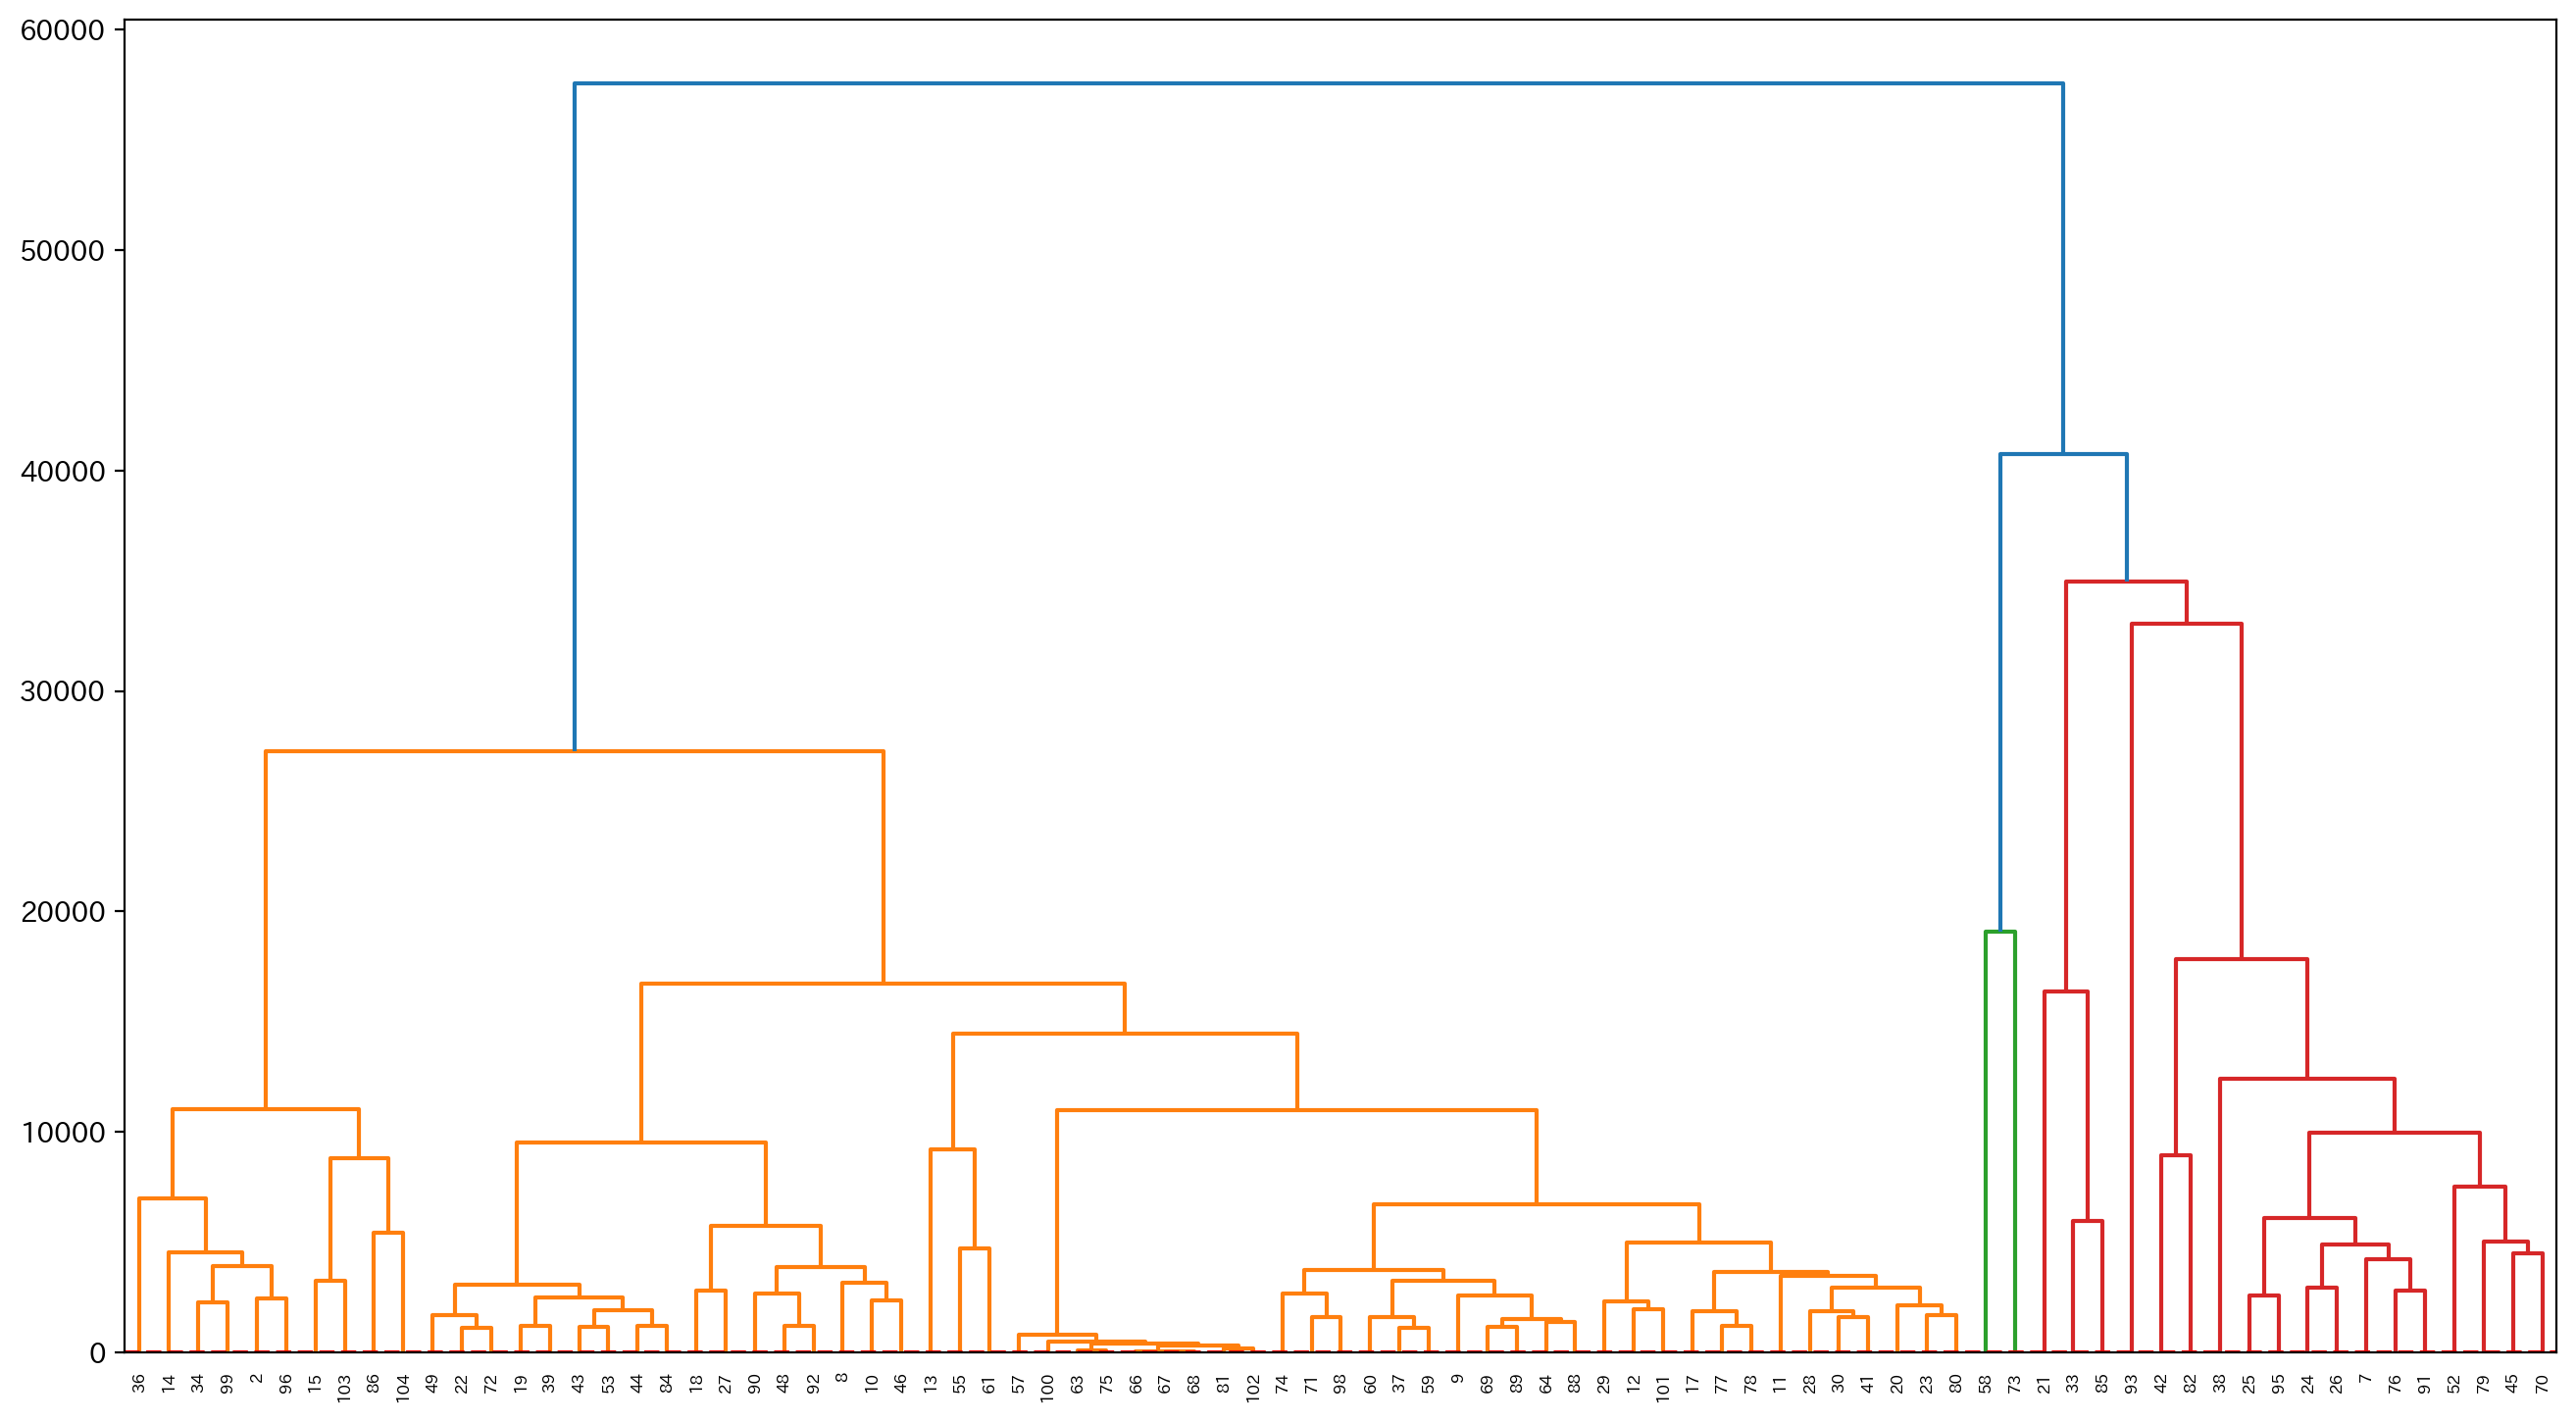

In [202]:
# クラスター分析のライブラリのインポート
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
layered_cluster_data = cluster_data[[ 'user_id','meals','working_alone', 'hobbies/breaks', 'housework/childcare', 'breaks(induty)', 'travel', 'web_conference', 'other', 'non_work','facettoface_meetings', 'collaborative_work', 'telephone(conference)','positive_score_x','depressive_score_x', 
    'anxious_score_x']].groupby('user_id').sum()
# 階層型クラスタリングの実施
# ウォード法 x ユークリッド距離
linkage_result = linkage(layered_cluster_data, method='ward', metric='euclidean')

# クラスター分けするしきい値を決める
threshold = 0.7 * np.max(linkage_result[:, 2])
# 階層型クラスタリングの可視化
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=layered_cluster_data.index, color_threshold=threshold)
plt.axhline(7, linestyle='--', color='r')
plt.show()

In [203]:
# クラスタリング結果の値を取得
clustered = fcluster(linkage_result, threshold, criterion='distance')
# クラスタリング結果を確認
print(clustered)

# テーブル全体を正規化
def minmax_norm(df):
    return (df - df.min()) / (df.max() - df.min())
layered_cluster_data = minmax_norm(layered_cluster_data)

# 階層クラスター分析の結果をDataFrame化
_class = pd.DataFrame({'class':clustered}, index= layered_cluster_data.index)
_class.head()

# 元データと分析結果を結合
layered_cluster_data2 = pd.concat([layered_cluster_data, _class] ,axis=1)
print(layered_cluster_data2.head())



[1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 3 3 1 1 1 1 3 1 1 1 3 1 1 3 1 1 3 1 1
 1 3 1 1 1 2 1 1 1 1 1 1 1 1 1 3 1 1 2 1 1 3 1 1 3 1 1 3 1 3 1 1 1 1 3 1 3
 3 1 1 1 1 1 1 1 1]
            meals  working_alone  hobbies/breaks  housework/childcare  \
user_id                                                                 
2        0.091227       0.115072        0.338426             0.013021   
7        0.175167       0.526425        0.052832             0.010194   
8        0.012718       0.143300        0.219537             0.006543   
9        0.055416       0.120800        0.000001             0.000000   
10       0.016306       0.275992        0.169656             0.001133   

         breaks(induty)    travel  web_conference     other  non_work  \
user_id                                                                 
2              0.514227  0.148336        0.003679  0.000000  0.701187   
7              0.373960  0.098112        0.002137  0.028681  0.232791   
8              0.206814  0

In [204]:
# 各セグメントの顧客数を確認 
layered_cluster_data2.groupby('class').size()

# セグメントごとにすべての商品カテゴリの平均値を算出
cluster_stats = np.round(layered_cluster_data2.groupby('class', as_index=False).mean() ,2)
cluster_stats.head()

# グラフ描画のために、縦長のデータ形式に変換
mat_melt = pd.melt(cluster_stats, id_vars='class', var_name='Category',value_name='Rate')
mat_melt.head()

,class,Category,Rate
0,1,meals,0.03
1,2,meals,0.02
2,3,meals,0.12
3,1,working_alone,0.15
4,2,working_alone,0.98


(0.0, 1.0)

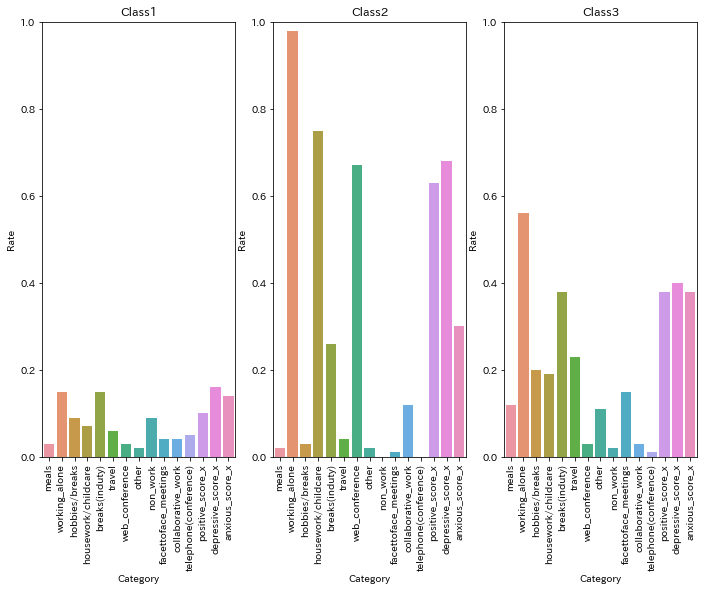

In [205]:
# セグメントの特徴をグラフにする
fig = plt.figure(figsize =(20,8))
ax1 = fig.add_subplot(1, 5, 1)
sns.barplot(x='Category', y='Rate', data=mat_melt[mat_melt['class'] == 1], ax=ax1)
plt.title('Class' + '1')
plt.xticks(rotation=90)
plt.ylim(0, 1)

ax2 = fig.add_subplot(1, 5, 2)
sns.barplot(x='Category', y='Rate', data=mat_melt[mat_melt['class'] == 2], ax=ax2)
plt.title('Class' + '2')
plt.xticks(rotation=90)
plt.ylim(0, 1)

ax3 = fig.add_subplot(1, 5, 3)
sns.barplot(x='Category', y='Rate', data=mat_melt[mat_melt['class'] == 3], ax=ax3)
plt.title('Class' + '3')
plt.xticks(rotation=90)
plt.ylim(0, 1)

,meals,working_alone,hobbies/breaks,housework/childcare,breaks(induty),travel,web_conference,other,non_work,facettoface_meetings,collaborative_work,telephone(conference),positive_score_x,depressive_score_x,anxious_score_x
user_id,,,,,,,,,,,,,,,
2,0.091227,0.115072,0.338426,0.013021,0.514227,0.148336,0.003679,0.000000,0.701187,0.053172,0.016956,0.299472,0.172446,0.002475,0.031365
7,0.175167,0.526425,0.052832,0.010194,0.373960,0.098112,0.002137,0.028681,0.232791,0.063261,0.026430,0.000000,0.261481,0.066832,0.363469
8,0.012718,0.143300,0.219537,0.006543,0.206814,0.004461,0.058684,0.002049,0.000034,0.000000,0.007496,0.088554,0.119963,0.091584,0.055351
9,0.055416,0.120800,0.000001,0.000000,0.043416,0.157208,0.002129,0.000000,0.000000,0.044610,0.013222,0.000000,0.049672,0.089109,0.083026
10,0.016306,0.275992,0.169656,0.001133,0.316597,0.000000,0.018183,0.000000,0.000000,0.000000,0.000000,0.000000,0.054358,0.000000,0.012915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.003324,0.017081,0.000000,0.000000,0.000000,0.000000,0.002767,0.000000,0.000000,0.113383,0.000000,0.000000,0.038425,0.009901,0.132841
101,0.020620,0.173827,0.046558,0.067826,0.272903,0.078949,0.072249,0.011396,0.000000,0.000000,0.000000,0.000000,0.119025,0.022277,0.020295
102,0.002432,0.013144,0.000000,0.000000,0.032836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011246,0.007426,0.007380
